In [10]:
library("igraph")

In [11]:
# Q1: Create a weighted undirected movie network
g = read.graph("movie_graph_edge_list.txt", format = "ncol", directed=FALSE)

# png(filename="2_1.png")
# plot(g,vertex.size=2,vertex.label=NA)

2.3 Neighborhood analysis of movies
---

- Question 9: For each of the movies listed above, extract it’s neighbors
and plot the distribution of the available ratings of the movies in the
neighborhood. Is the average rating of the movies in the neighborhood
similar to the rating of the movie whose neighbors have been extracted?
In this question, you should have 3 plots.

In [158]:
Get_Rating_Distribution=function(movie_id,movie_name,rating_list)
{
    #input: movie_id: the movie's id;   rating_list: (movie_id, rating)
    #output: distribution plot, x-axis:rating, y-axis:frequency
    
    movie_idx=which(V(g)$name==movie_id)
    neighbor_idx_set=neighbors(g,movie_idx)
    neighbor_id_set=V(g)$name[neighbor_idx_set]
    neighbor_rating_set=numeric(0)
    for (node in neighbor_id_set){
        rating_idx=which(rating_list$movie_id==node)
        if (length(rating_idx)>0){
            neighbor_rating_set=c(neighbor_rating_set,rating_list$movie_rating[rating_idx])
        }
    }
    x=seq(0,10,0.1)
    y=rep(0,length(x))
    for (rating in neighbor_rating_set){
        idx=which(x==rating)
        y[idx]=y[idx]+1
    }
    distribution=y/sum(y)
    plot(x,distribution,type='o',lwd=1, xlab="Rating",ylab="Distribution",
     main=c("The rating distribution: ",movie_name))
    Mean=0;
    for (i in 1:length(x)){
        Mean=Mean+x[i]*distribution[i]
    }
    cat("The average rating of ",movie_name, "is: ",Mean,"\n")
}

movie_id=c(12596,48391,100856)
# load rating file
filepath1 = "movie_idrating_map.txt"
filepath2="community_movie.txt"

movie_names=c("Batman v Superman: Dawn of Justice (2016)",
              "Mission: Impossible - Rogue Nation (2015)",
             "Minions (2015)")
community_list=read.table(filepath2, header = FALSE, 
                                 sep = '\t', col.names=c('community_id','movie_id'))
rating_list=read.table(filepath1, header = FALSE, 
                                 sep = '\t', col.names=c('movie_id','movie_rating'))



The average rating of  Batman v Superman: Dawn of Justice (2016) is:  6.383955 


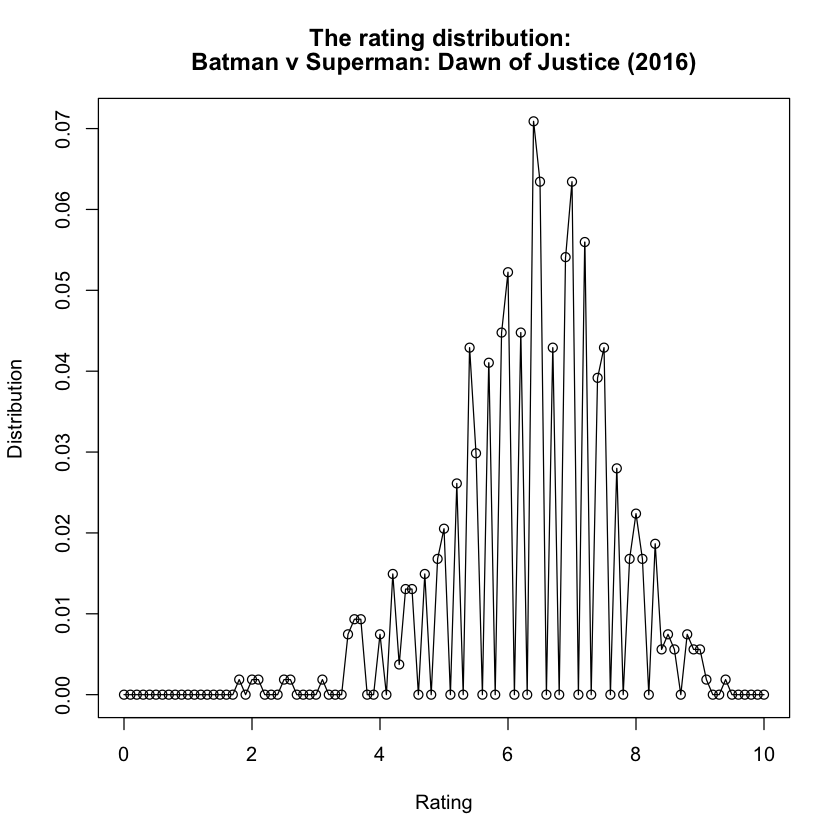

In [159]:
Get_Rating_Distribution(movie_id[1],movie_names[1], rating_list)

The average rating of  Mission: Impossible - Rogue Nation (2015) is:  6.255808 


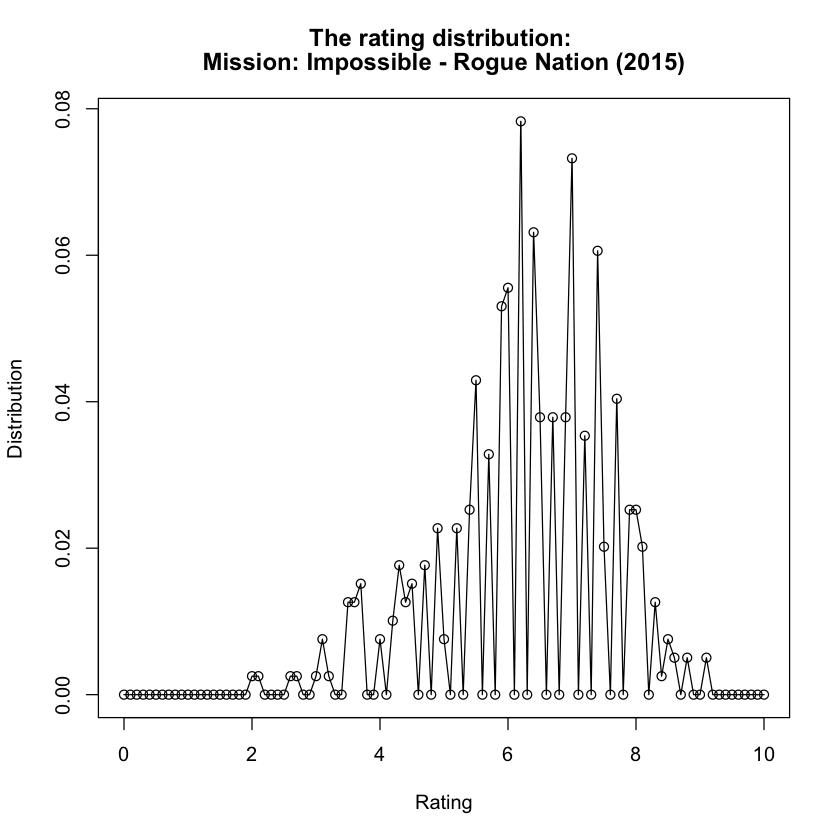

In [160]:
Get_Rating_Distribution(movie_id[2],movie_names[2], rating_list)

The average rating of  Minions (2015) is:  6.90276 


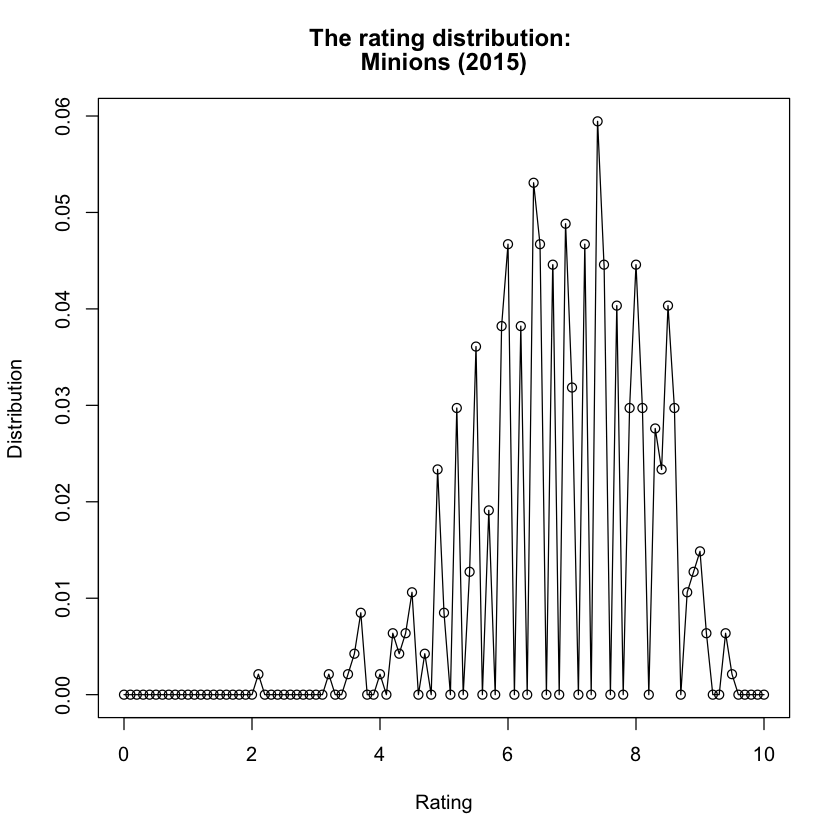

In [161]:
Get_Rating_Distribution(movie_id[3],movie_names[3], rating_list)

- Question 10: Repeat question 9, but now restrict the neighborhood
to consist of movies from the same community. Is there a better match
between the average rating of the movies in the restricted neighborhood
and the rating of the movie whose neighbors have been extracted.
In this question, you should have 3 plots.

In [162]:
Get_Rating_Distribution_with_Comm=function(movie_id,movie_name,rating_list,community_list){
    #input: movie_id: the movie's id;   rating_list: (movie_id, rating)
    #        community_list: (community_id,movie_id)
    #output: distribution plot, x-axis:rating, y-axis:frequency
    commID=community_list$community_id[community_list$movie_id==movie_id]
    movie_idx=which(V(g)$name==movie_id)
    neighbor_idx_set=neighbors(g,movie_idx)
    neighbor_id_set=V(g)$name[neighbor_idx_set]
    neighbor_rating_set=numeric(0)
    for (node in neighbor_id_set){
        rating_idx=which(rating_list$movie_id==node)
        comm_id=community_list$community_id[community_list$movie_id==node]
        if (length(rating_idx)>0 && comm_id==commID){
            neighbor_rating_set=c(neighbor_rating_set,rating_list$movie_rating[rating_idx])
        }
    }
    x=seq(0,10,0.1)
    y=rep(0,length(x))
    for (rating in neighbor_rating_set){
        idx=which(x==rating)
        y[idx]=y[idx]+1
    }
    distribution=y/sum(y)
    plot(x,distribution,type='o',lwd=1, xlab="Rating",ylab="Distribution",
     main=c("The rating distribution with community: ",movie_name))
    Mean=0;
    for (i in 1:length(x)){
        Mean=Mean+x[i]*distribution[i]
    }
    cat("The average rating of ",movie_name, "is: ",Mean,"\n")
}

The average rating of  Batman v Superman: Dawn of Justice (2016) is:  6.365784 


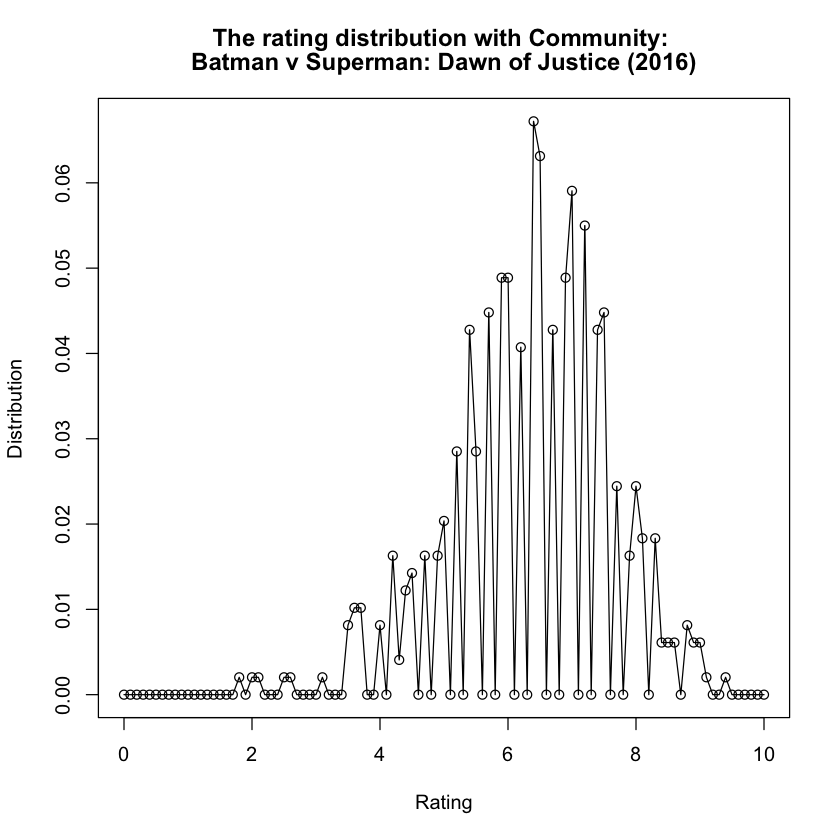

In [163]:
Get_Rating_Distribution_with_Comm(movie_id[1],movie_names[1], rating_list,community_list)

The average rating of  Mission: Impossible - Rogue Nation (2015) is:  6.364171 


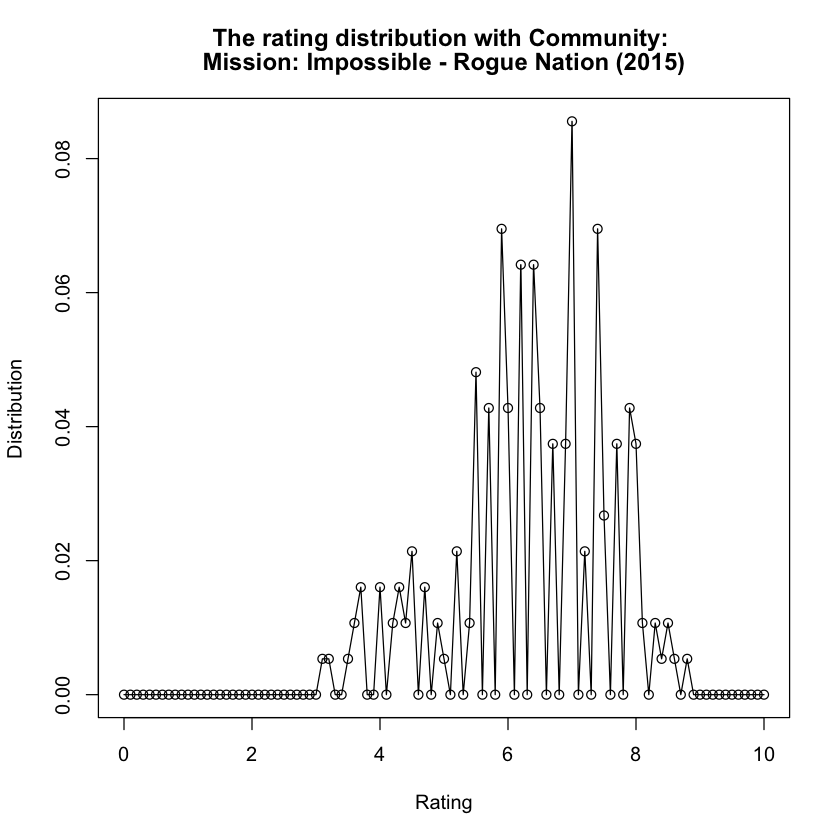

In [164]:
Get_Rating_Distribution_with_Comm(movie_id[2],movie_names[2], rating_list,community_list)

The average rating of  Minions (2015) is:  6.938164 


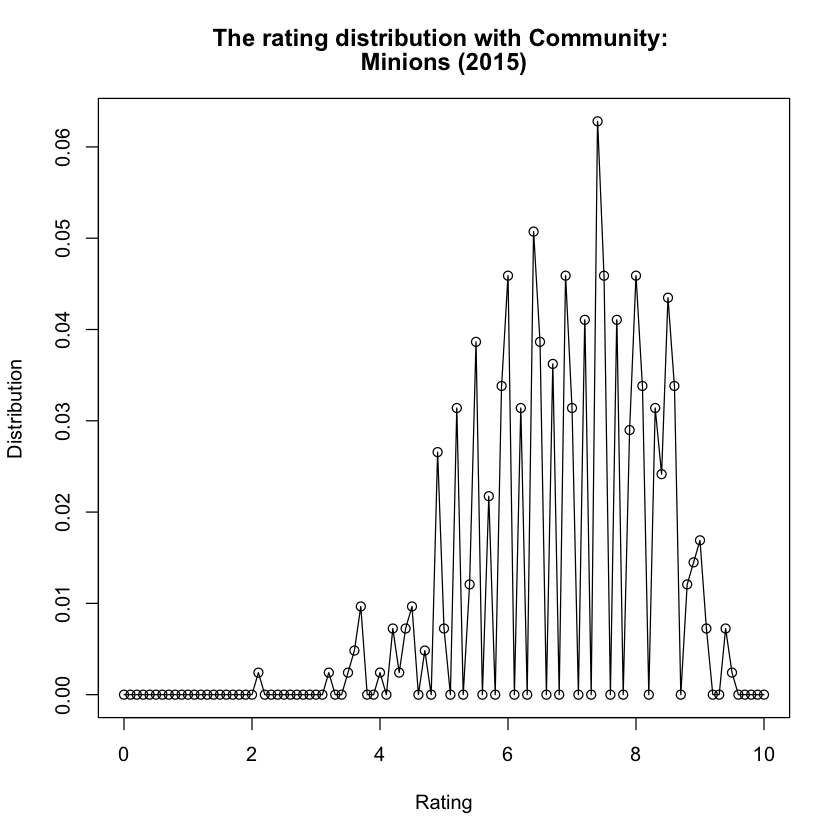

In [165]:
Get_Rating_Distribution_with_Comm(movie_id[3],movie_names[3], rating_list,community_list)

- Question 11: For each of the movies listed above, extract it’s top 5 neighbors
and also report the community membership of the top 5 neighbors.
In this question, the sorting is done based on the edge weights.

In [172]:
for (mid in movie_id)
{
  #Locate movie in the graph
  movie_idx = which(V(g)$name == mid)
  temp_idx=which(movie_id==mid)
    
  #Find the neighbor of the movie
  neighbor_node_set = neighbors(g,movie_idx)
  neighbor_node_set=neighbor_node_set
#   cat("neighbor set: ",temp,'\n')
    
  #Find the five nearest movie according to the weight
  neighbor_weight_set=numeric(0)
  for (neighbor_node in neighbor_node_set){
    #print(nei_node)
    neighbor_weight = E(g,P=c(movie_idx,neighbor_node))$weight
    neighbor_weight_set = c(neighbor_weight_set,neighbor_weight)
  }
  weight_set_inorder = sort(neighbor_weight_set,decreasing =T,index.return =T)
  near_neighbor_idx = neighbor_node_set[weight_set_inorder$ix[1:5]]
  near_neighbor_id = V(g)$name[near_neighbor_idx]
  cat("The top 5 neighbors of ",movie_names[temp_idx]," is:",near_neighbor_id,'\n')
  community_set=numeric(0)
  for (node in near_neighbor_id){
        comm_id=community_list$community_id[community_list$movie_id==node]
        community_set=c(community_set,comm_id)
    }
    cat("The community ID of",movie_names[temp_idx]," is:",community_set,'\n')
    cat("==============================================================================\n")
}

The top 5 neighbors of  Batman v Superman: Dawn of Justice (2016)  is: 26904 12643 40747 11623 4341 
The community ID of Batman v Superman: Dawn of Justice (2016)  is: 1 1 1 1 1 
The top 5 neighbors of  Mission: Impossible - Rogue Nation (2015)  is: 40101 40107 72242 87095 48392 
The community ID of Mission: Impossible - Rogue Nation (2015)  is: 5 5 4 4 1 
The top 5 neighbors of  Minions (2015)  is: 46241 20422 65512 46205 77060 
The community ID of Minions (2015)  is: 1 1 1 1 1 
